## California Housing Price

In [1]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Data preparation

dataset = pd.read_csv('housing.csv')
df = dataset[['median_income','median_house_value']]

## 1. Provide visualization of median house value based on longitude and latitude, explain your results.

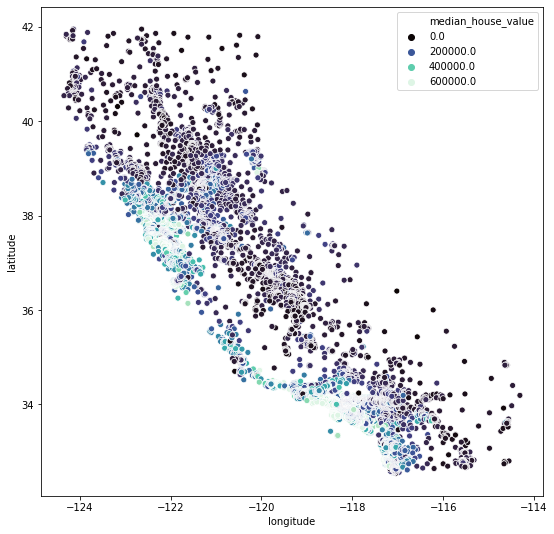

In [3]:
#Visualisation of median house value based on longitude and latitude both

plt.figure(figsize=(9,9))
sns.scatterplot(x='longitude', y='latitude', data=dataset,hue = 'median_house_value', palette='mako')

plt.show()

Text(0, 0.5, 'median_house_value')

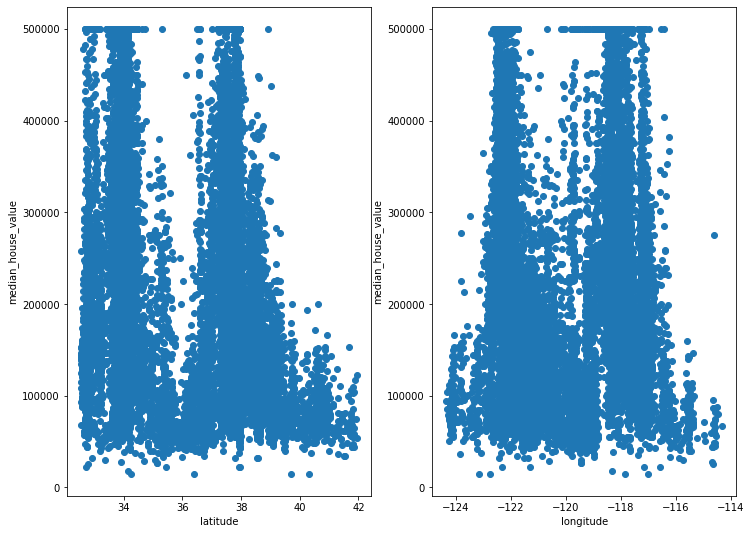

In [4]:
#Visualisation of median house value based on longitude and latitude individually


fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(dataset['latitude'],dataset['median_house_value'])
ax2.scatter(dataset['longitude'],dataset['median_house_value'])
ax1.set_xlabel('latitude')
ax1.set_ylabel('median_house_value')
ax2.set_xlabel('longitude')
ax2.set_ylabel('median_house_value')

### We can observe that in this dataset the latitude and longitude have no evident relation with median house value.

## 2. Apply ordinary least squares estimation to build a simple linear regression model: Median_house_value= α + β × Median_income.

In [45]:
#selecting dependent and independent variable for regression analysis
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#spliting data into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [46]:
#performing regression analysis using OLS


import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)
X_test_lm = sm.add_constant(X_test)

lr_1 = sm.OLS(y_train, X_train_lm).fit()
#print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                 1.270e+04
Date:                Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:53:04   Log-Likelihood:                 4720.9
No. Observations:               13760   AIC:                            -9438.
Df Residuals:                   13758   BIC:                            -9423.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1030      0.003     34.512      0.0

## 3. Detect heteroscedasticity in the regression model in 2), interpret your results.

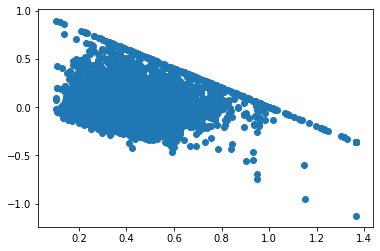

In [54]:
#Checking heteroscedasticity

y_pred =  lr_1.predict(X_test_lm)
resid = y_test - y_pred
plt.scatter(y_pred, resid)

### After running regression and analyzing the residuals we can se that there is no presence of heteroskedasticity as residual structure is straight and variance is in similar range. So, we can say that the data has homoscedasticity in it.

## 4. How to interpret R-squared of the regression model? Is a high R-squared always better?

#### Ans. R-squared tells how well the regression model fits the observed data. If R-squared is 80% then it is said that 80% of data fit the regression model. Basically this means more the R-squared better it is. But high r-squared is not always good because sometimes even a high r-squared model can under perform. The quality model depends on many factors like variables included in model, unit of measure of the variables etc.


## 5. Suppose to split data into training and testing set, what does high training accuracy but low testing accuracy indicate?
#### Ans. High trainng accuracy means that the model is overfitted which means it has learned the characterstics or parameters that help to perform good in training data set but it is not applicable in testing dataset. There is one more possibility that the model need a larger population data to train.


## 6. Is there any drawback of the current regression model? If there is, list a potential way that may improve the model performance.
#### Ans. The drawback of current regression model is that the variables used to train the model are less. In this we have used single independent variable which has a significant effect on dependent variable but we should add more variables in it which have high correlation with dependent the variables.
